In [4]:
from eval_gnn import eval_gnn
from str2env import str2env
import numpy as np

In [5]:
# evaluation on the test cases
env, indexes = str2env('maze2easy')  # choose env among ('maze2easy', 'maze2hard', 'kuka7', 'ur5', 'snake7', 'kuka13', 'kuka14')


In [6]:
# test on new environment
from tqdm import tqdm
from config import set_random_seed
from str2name import str2name
import torch
from eval_gnn import explore

from environment import MazeEnv
env = MazeEnv(dim=2, map_file='maze_files/mazes_new_dataset.npz')
indexes = range(0, 1000)
bs = 100  # only sample 100 points
results = []

_, model, model_path, model_s, model_s_path = str2name(str(env))
model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
model_s.load_state_dict(torch.load(model_s_path, map_location=torch.device("cpu")))
model.eval()
model_s.eval()

# print(model)

for i in tqdm(range(10)):
    
    env.init_new_problem(i)
    set_random_seed(1234)
    _, model, model_path, model_s, model_s_path = str2name(str(env))
    result = explore(env, model, model_s, smooth=True, smoother=None, batch=bs, t_max=bs, k=10) 
    
    results.append(result)

100%|██████████| 10/10 [00:02<00:00,  3.84it/s]


In [7]:
# get the collision numbers
c_explores = [r['c_explore'] for r in results]

<Figure size 640x480 with 0 Axes>

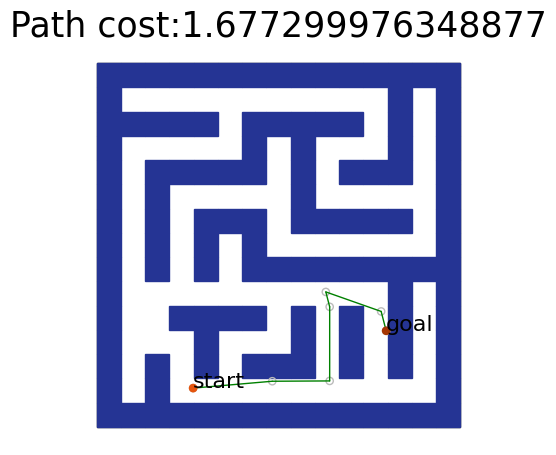

In [8]:
from utils.plot import plot_edges, plot_env_only, plot_optimization_edges
%matplotlib inline
import matplotlib.pyplot as plt
from utils.plot import plot_edges
i = np.argmin(c_explores)
env.init_new_problem(i)
edges = results[i]['data'].v[ np.array(results[i]['explored_edges']).reshape(-1) ].reshape(-1, 2, 2)
edges = [[tuple(k), tuple(v)] for k, v in zip(edges[:, 0, :].cpu().numpy(), edges[:, 1, :].cpu().numpy())]
distance = env.path_distance(results[i]['smooth_path'])
plot_optimization_edges(results[i]['path'], edges, env.get_problem(), \
           title='Path cost:{}'.format(round(distance[0], 4)), \
           save=None)
plt.show()

<Figure size 640x480 with 0 Axes>

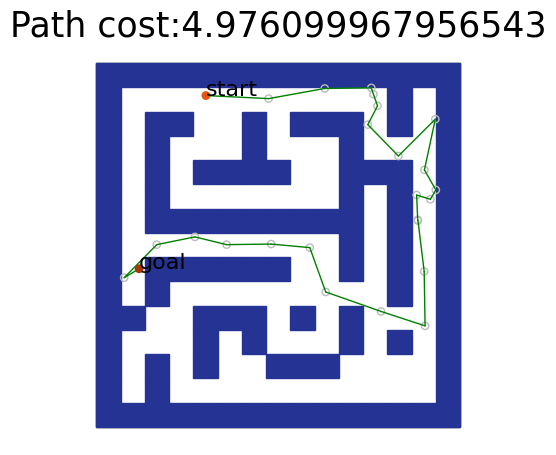

In [9]:
from utils.plot import plot_edges, plot_env_only, plot_optimization_edges
%matplotlib inline
import matplotlib.pyplot as plt
from utils.plot import plot_edges
i = np.argmax(c_explores)
env.init_new_problem(i)
edges = results[i]['data'].v[ np.array(results[i]['explored_edges']).reshape(-1) ].reshape(-1, 2, 2)
edges = [[tuple(k), tuple(v)] for k, v in zip(edges[:, 0, :].cpu().numpy(), edges[:, 1, :].cpu().numpy())]
distance = env.path_distance(results[i]['smooth_path'])
plot_optimization_edges(results[i]['smooth_path'], edges, env.get_problem(), \
           title='Path cost:{}'.format(round(distance[0], 4)), \
           save=None)
plt.show()